# **Установка R**

In [29]:

!apt-get install -y r-base



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [30]:
%%R
install.packages("dplyr", repos="https://cloud.r-project.org")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cloud.r-project.org/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB


The downloaded source packages are in
	‘/tmp/RtmpwFKAvC/downloaded_packages’

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# **Подключение R в Python**


**Цель:** Настроить R в Colab, чтобы можно было выполнять R-код.

In [31]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# **Загрузка файла**


**Цель:** Поместить ваш набор данных (teaching_method (2).csv) в среду Colab, чтобы Python или R могли его использовать.

In [32]:
from google.colab import files
uploaded = files.upload()


Saving teaching_method.csv to teaching_method (3).csv


# **Чтение CSV в R**



**Цель: **Загрузить набор данных и проверить его содержимое.



Этот набор данных содержит оценки студентов, полученные при разных методах обучения. Каждая строка показывает оценку студента и метод обучения, который он проходил. С помощью этих данных можно сравнить, как различные методы обучения влияют на успеваемость студентов.


Этот набор данных содержит оценки студентов, полученные при разных методах обучения. Данные состоят из двух столбцов:

Method – используемый метод обучения (Lecture-based, Discussion-based, Problem-based learning или Project-based learning)

Score – оценка или результат студента

In [33]:
%%R
data <- read.csv("teaching_method.csv")
print(data)


                   Method Score
1           Lecture-based    78
2           Lecture-based    82
3           Lecture-based    85
4           Lecture-based    79
5           Lecture-based    88
6           Lecture-based    84
7           Lecture-based    81
8           Lecture-based    87
9           Lecture-based    90
10          Lecture-based    83
11          Lecture-based    86
12          Lecture-based    80
13          Lecture-based    89
14          Lecture-based    85
15          Lecture-based    82
16          Lecture-based    88
17          Lecture-based    84
18          Lecture-based    87
19          Lecture-based    81
20          Lecture-based    86
21       Discussion-based    75
22       Discussion-based    78
23       Discussion-based    80
24       Discussion-based    77
25       Discussion-based    82
26       Discussion-based    79
27       Discussion-based    81
28       Discussion-based    83
29       Discussion-based    80
30       Discussion-based    78
31      

# **Remove Missing Value**

In [34]:
%%R
# Count missing values
colSums(is.na(data))

# Remove rows with NA
data_clean <- na.omit(data)


# **Ensure Correct data type**

In [35]:
%%R
data_clean$Method <- as.factor(data_clean$Method)
data_clean$Score  <- as.numeric(data_clean$Score)


# **Remove Duplicate Observation**

In [36]:
%%R
data_clean <- distinct(data_clean)


# **Визуализация методов обучения**


**Цель:** График показывает каждый метод обучения и отображает общее количество студентов в каждой группе.

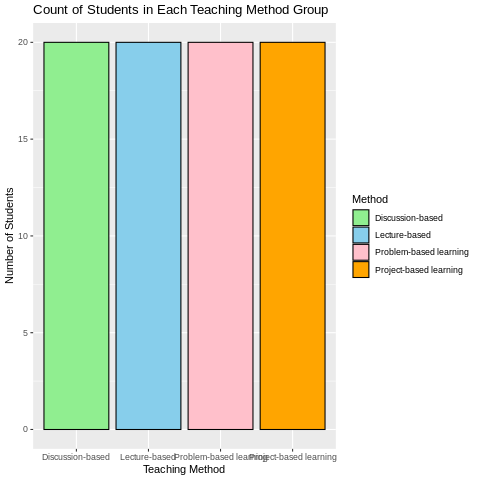

In [37]:
%%R
library(ggplot2)

# Plot: ggplot for group comparison
ggplot(data, aes(x = Method, fill = Method)) +
  geom_bar(color = "black") +
  labs(x = "Teaching Method",
       y = "Number of Students",
       title = "Count of Students in Each Teaching Method Group") +
  scale_fill_manual(values = c("Lecture-based" = "skyblue",
                               "Discussion-based" = "lightgreen",
                               "Problem-based learning" = "pink",
                               "Project-based learning" = "orange"))


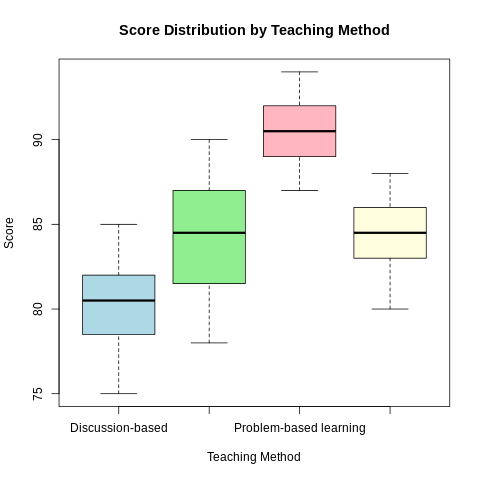

In [38]:
%%R

# Boxplot visualization
boxplot(Score ~ Method, data = data,
        main = "Score Distribution by Teaching Method",
        xlab = "Teaching Method", ylab = "Score",
        col = c("lightblue","lightgreen","lightpink","lightyellow"))

# **Какие компоненты вычисляются в однофакторном ANOVA?**


| Component      | What it Measures                      | Formula                                     |
| -------------- | ------------------------------------- | ------------------------------------------- |
| **DF_between** | Freedom among group means             | k - 1                                       |
| **DF_within**  | Freedom among individual scores       | N - k                                       |
| **SS_between** | Variation explained by groups         | Σ n_i (X̄_i − X̄)^2                          |
| **SS_within**  | Variation within groups               | Σ (X_ij − X̄_i)^2                            |
| **MS_between** | Between-group variance                | SS_between / DF_between                     |
| **MS_within**  | Error variance                        | SS_within / DF_within                       |
| **F value**    | Ratio of variances                    | MS_between / MS_within                      |
| **p-value**    | Probability of observing this F       | P(F ≥ F_observed)                           |


In [39]:
%%R
anova_result <- aov(Score ~ Method, data=data)
summary(anova_result)


            Df Sum Sq Mean Sq F value Pr(>F)    
Method       3 1047.7   349.2   53.98 <2e-16 ***
Residuals   76  491.8     6.5                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# **Пост-хок тест (критерий Тьюки, Tukey HSD)**



**Цель:** После того как ANOVA показывает значимые различия, пост-хок тесты выявляют, какие группы отличаются друг от друга, какая группа показывает наилучший результат и помогают принимать решения.

In [40]:
%%R
TukeyHSD(anova_result)


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Score ~ Method, data = data)

$Method
                                               diff       lwr       upr
Lecture-based-Discussion-based                 3.85  1.737037  5.962963
Problem-based learning-Discussion-based       10.10  7.987037 12.212963
Project-based learning-Discussion-based        3.90  1.787037  6.012963
Problem-based learning-Lecture-based           6.25  4.137037  8.362963
Project-based learning-Lecture-based           0.05 -2.062963  2.162963
Project-based learning-Problem-based learning -6.20 -8.312963 -4.087037
                                                  p adj
Lecture-based-Discussion-based                0.0000478
Problem-based learning-Discussion-based       0.0000000
Project-based learning-Discussion-based       0.0000377
Problem-based learning-Lecture-based          0.0000000
Project-based learning-Lecture-based          0.9999130
Project-based learning-Prob

In [48]:
%%R
ls()



[1] "anova_result" "data"         "data_clean"  


In [49]:
%%R
library(dplyr)

means <- data %>%
  group_by(Method) %>%
  summarise(mean_score = mean(Score, na.rm = TRUE))

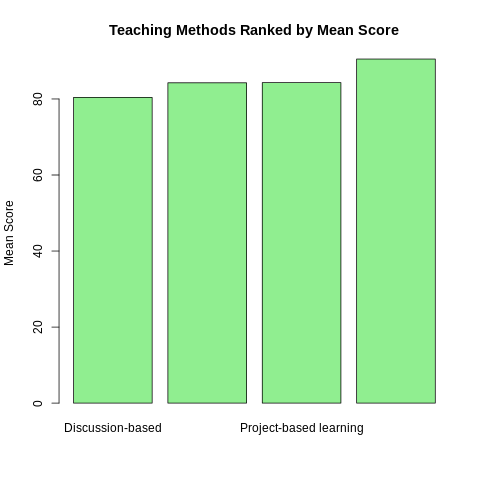

In [50]:
%%R
means_ordered <- means %>%
  arrange(mean_score)

barplot(means_ordered$mean_score,
        names.arg = means_ordered$Method,
        col = "lightgreen",
        main = "Teaching Methods Ranked by Mean Score",
        ylab = "Mean Score")
